# kNN basic practice

## sklearn.neighbors

docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Toy task - only 2 features

In [2]:
classification_problem = datasets.make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_classes=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [3]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=100)
    plt.show()

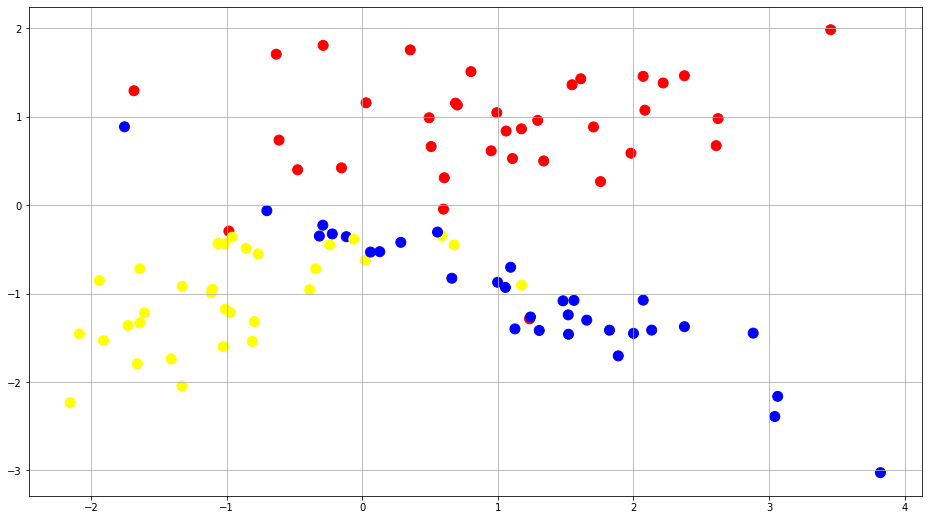

In [4]:
plot_dataset(classification_problem)

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size=0.3,
    random_state=1,
)

# Let's build our model!

In [6]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [7]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.9

In [8]:
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 0])

### And visualize

In [9]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [10]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1, 2, 2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

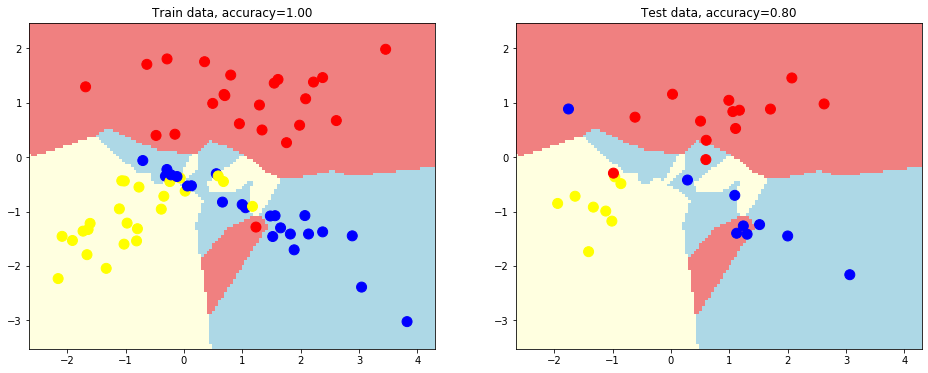

In [11]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

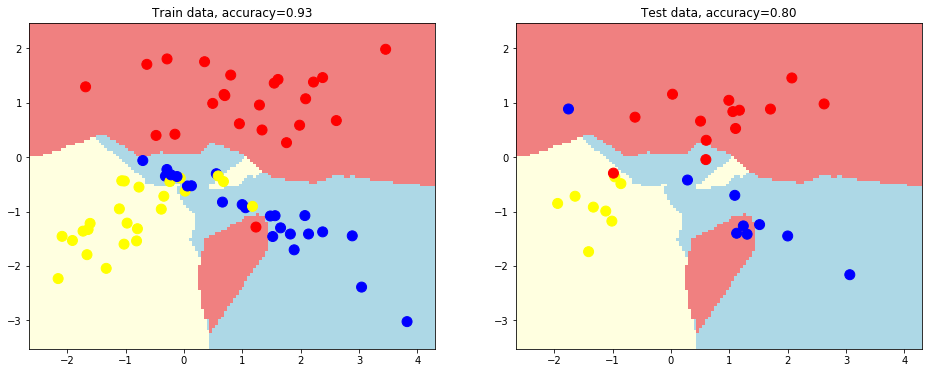

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

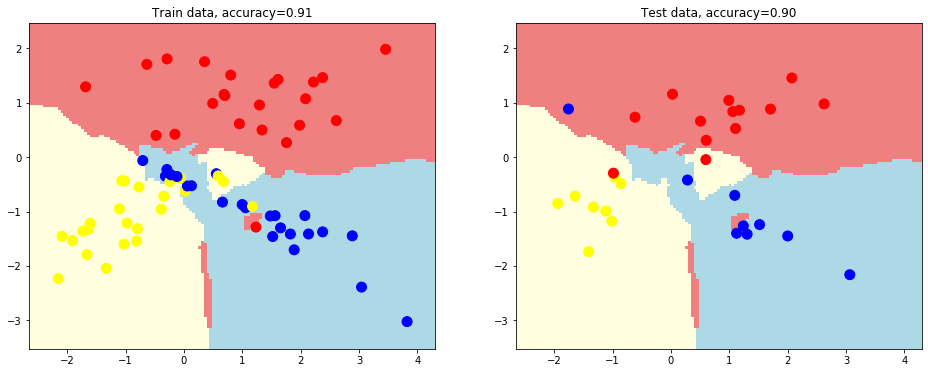

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

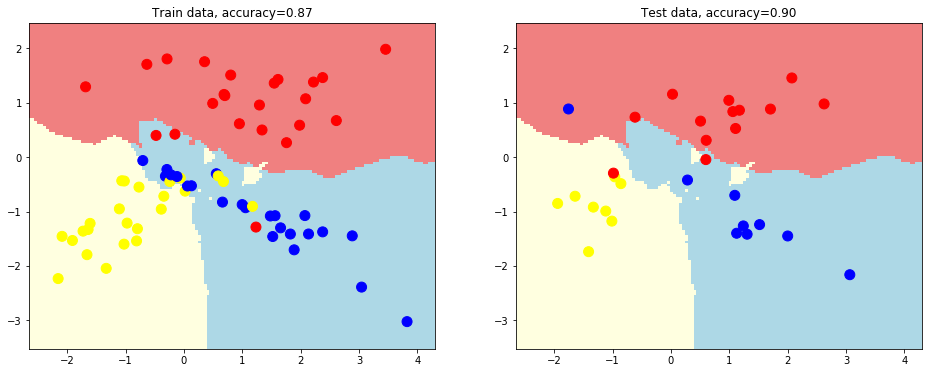

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

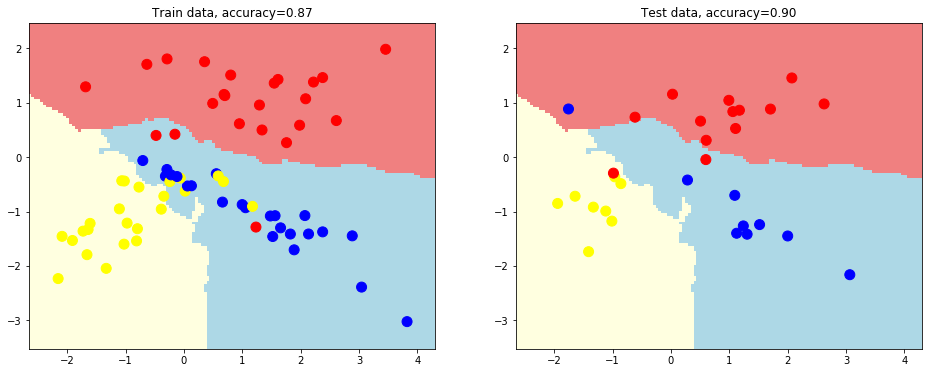

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

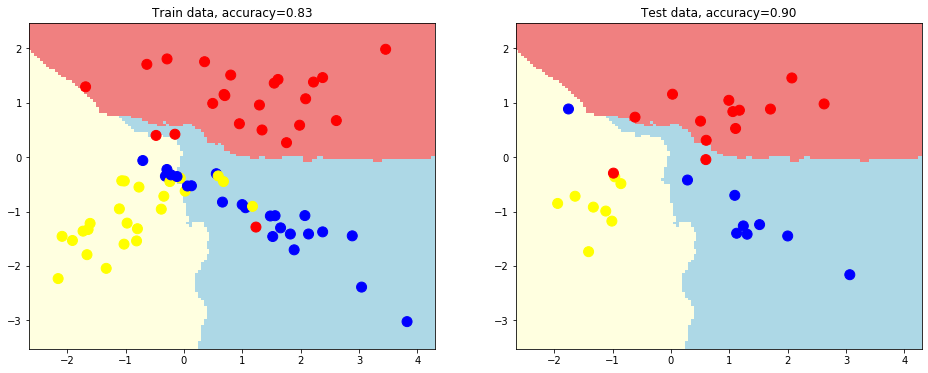

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

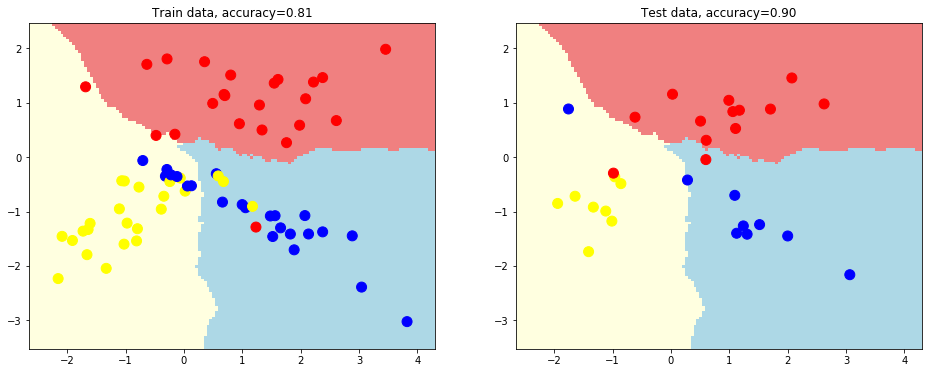

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

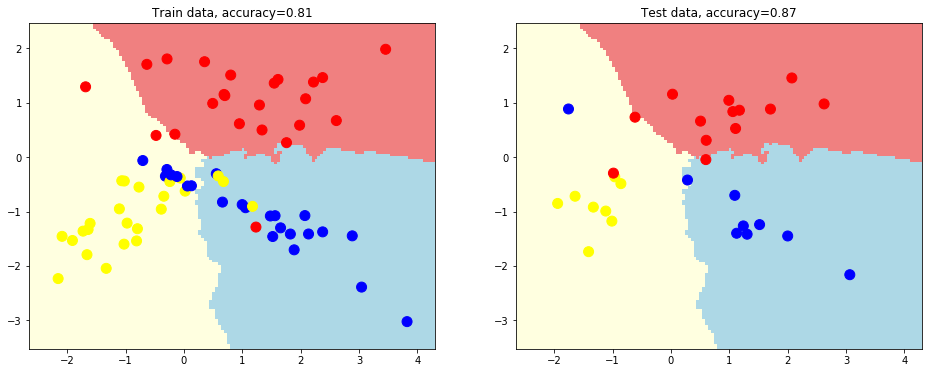

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [19]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50, 
    n_classes=3,
    n_redundant=50, 
    n_clusters_per_class=1,
    random_state=42,
)

In [20]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    hard_problem[0], 
    hard_problem[1], 
    test_size=0.3,
    random_state=1,
)

In [21]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [22]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.6

## Or not so good...

In [23]:
def train_knn_classifier(dimensions, n_classes):
    scores = []
    
    for dim in dimensions:
        problem = datasets.make_classification(n_samples=1000, n_features=dim, n_informative=dim // 2, 
                                               n_classes=5, n_redundant=dim // 2, 
                                               n_clusters_per_class=1, random_state=42)

        train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1,
        )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)

        predictions = clf.predict(test_data)
        acc = metrics.accuracy_score(test_labels, predictions)

        scores.append(acc)

    plt.figure(figsize=(16, 9))
    plt.plot(dimensions, scores)
    plt.show()

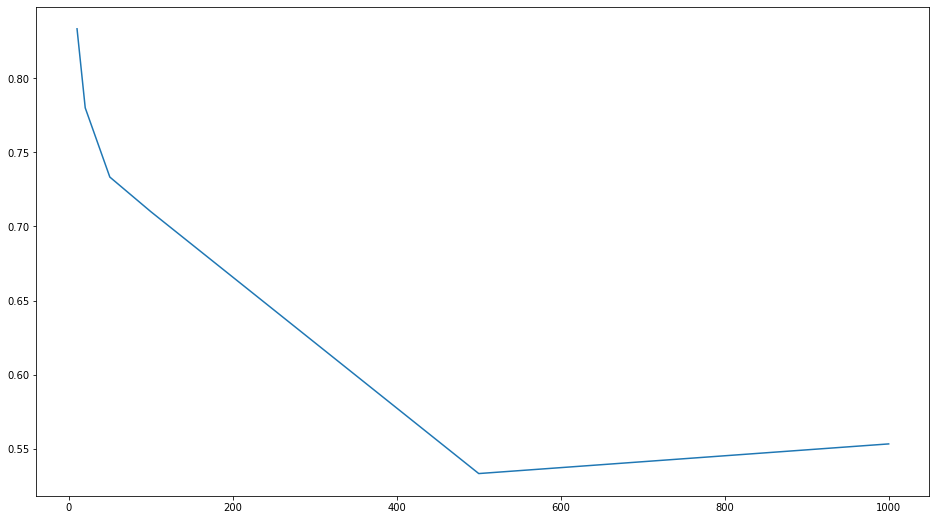

In [24]:
train_knn_classifier([10, 20, 50, 100, 500, 1000], 5)

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [25]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > ./wine_data.csv

In [26]:
import pandas as pd

In [27]:
dataset = pd.read_csv('wine_data.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
X = dataset.drop(0, axis=1).as_matrix()
y = dataset[0].as_matrix()

/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [30]:
from sklearn.metrics import accuracy_score

def measure_quality(predictions):
    return accuracy_score(y_test, predictions)

# Bonus area
### Those who get accuracy of at least 0.8 get bonus [0.5 max]

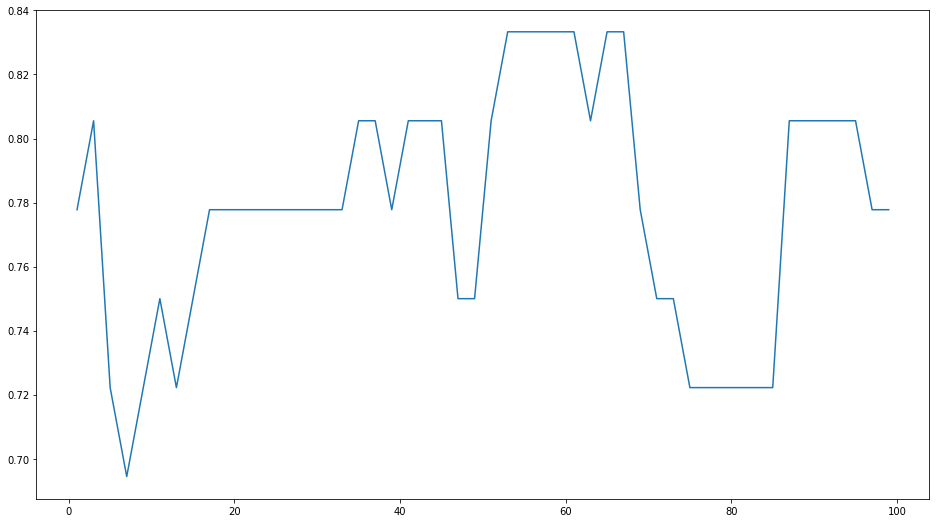

In [31]:
neighb = [x for x in range(1, 100, 2)]
acc = []
for n_neighb in neighb:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighb)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc.append(measure_quality(y_pred))
    
plt.figure(figsize=(16, 9))
plt.plot(neighb, acc)
plt.show()

The best accuracy score estimates with number of neighbors near of 60 and is 0.83